In [63]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import pyplot
import scipy.stats as stats
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import random
rng = np.random.default_rng()
sn.set_style('whitegrid')

In [66]:
#import and create cleaned stimuli strings which can be copied directly into GPT if desired
#find difference score between human ratings (Graves 2013) and GPTv3.5 (March 14)

home_direct = 'C:/Users/Nick/Downloads/meat-kangaroo-main/'

all_words_and_measures = pd.read_csv(home_direct + 'graves_with_vecs.csv', skipinitialspace=True, )

all_words_and_measures['Humans Binary'] = np.where(
    all_words_and_measures['Humans Continuous'] >= 2.5, 'Makes Sense', np.where(
    all_words_and_measures['Humans Continuous'] <= 1.5, 'Nonsense', 'Ambiguous'))

#all_words_and_measures['Stim'] = 'the ' + all_words_and_measures['Stim'].str.replace('-', ' ') + '.'
all_words_and_measures['Difference Score'] = abs(all_words_and_measures['Humans Continuous'] - all_words_and_measures['GPT Continuous Temp 0'])
all_words_and_measures

# all_words_and_measures.to_excel('cleaned_words.xlsx')

,Stim,Bard,Bard 0 or 1,Bard Continuous,GPT Temp 0,GPT Temp .5,GPT Temp 1,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,...,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,pairs,Word2Vec,GloVe,Taxonomic,Humans Binary,Difference Score
0,the alcohol blood.,Nonsense,0,2,Nonsense,Nonsense,Nonsense,2,2,2,...,2860,2.51,3.40,5.91,alcohol blood,0.371276,0.402202,0.570252,Nonsense,1.29
1,the alcohol screen.,Nonsense,0,1,Makes Sense,Makes Sense,Makes Sense,2,2,2,...,842,2.51,2.71,5.22,alcohol screen,0.066408,0.079153,0.174365,Nonsense,1.10
2,the alligator mouth.,Makes Sense,1,2,Makes Sense,Makes Sense,Nonsense,3,2,3,...,2435,1.38,3.38,4.76,alligator mouth,0.212631,0.283078,0.205588,Makes Sense,0.54
3,the alligator skin.,Nonsense,0,3,Makes Sense,Makes Sense,Makes Sense,3,3,3,...,1641,1.38,3.21,4.59,alligator skin,0.150999,0.284452,0.227702,Makes Sense,0.93
4,the ankle bracelet.,Nonsense,0,3,Makes Sense,Makes Sense,Makes Sense,4,3,3,...,250,2.27,1.81,4.08,ankle bracelet,0.158441,0.392702,0.263679,Makes Sense,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,the worm farmer.,Nonsense,0,2,Makes Sense,Makes Sense,Makes Sense,3,3,3,...,695,2.12,2.75,4.87,worm farmer,0.118636,0.056309,0.270838,Makes Sense,0.50
2156,the yarn ball.,Nonsense,0,3,Makes Sense,Makes Sense,Makes Sense,3,3,3,...,1688,1.38,3.22,4.60,yarn ball,0.093765,0.204294,0.390770,Makes Sense,0.59
2157,the zebra skin.,Nonsense,0,3,Makes Sense,Makes Sense,Makes Sense,3,4,3,...,1641,1.38,3.21,4.59,zebra skin,0.194411,0.228384,0.232424,Makes Sense,0.86
2158,the zipper teeth.,Makes Sense,1,2,Makes Sense,Nonsense,Nonsense,2,2,2,...,1420,1.38,3.14,4.53,zipper teeth,0.230624,0.226168,0.463075,Ambiguous,0.07


In [67]:
all_words_and_measures.describe().round(decimals=2)

,Bard 0 or 1,Bard Continuous,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,Class,Humans Continuous,SD,N,EAT,...,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,Word2Vec,GloVe,Taxonomic,Difference Score
count,2160.00,2160.00,2160.00,2160.00,2160.00,2160.0,2160.00,2160.00,2160.00,2045.00,...,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00
mean,0.67,2.45,2.77,2.71,2.59,0.0,2.03,1.05,28.38,0.02,...,1724.97,1724.97,3449.94,2.88,2.88,5.76,0.23,0.27,0.39,1.24
std,0.47,0.71,0.75,0.67,0.55,1.0,1.22,0.40,1.59,0.06,...,2209.81,2209.81,3127.70,0.61,0.61,0.88,0.14,0.13,0.18,0.80
min,0.00,0.00,0.00,0.00,0.00,-1.0,0.04,0.00,26.00,0.00,...,7.00,7.00,83.00,0.85,0.85,3.21,-0.05,-0.07,0.08,0.00
25%,0.00,2.00,2.00,2.00,2.00,-1.0,0.97,0.85,28.00,0.00,...,280.50,280.50,1146.25,2.45,2.45,5.18,0.13,0.18,0.26,0.64
50%,1.00,2.00,3.00,3.00,3.00,0.0,1.69,1.13,28.00,0.00,...,829.00,829.00,2252.00,2.92,2.92,5.81,0.21,0.26,0.36,1.10
75%,1.00,3.00,3.00,3.00,3.00,1.0,3.24,1.33,29.00,0.00,...,1998.00,1998.00,5050.50,3.30,3.30,6.39,0.30,0.35,0.50,1.76
max,1.00,4.00,4.00,4.00,4.00,1.0,4.00,1.85,58.00,1.00,...,8831.00,8831.00,15827.00,3.95,3.95,7.79,0.81,0.71,0.97,3.90


<AxesSubplot:xlabel='SD', ylabel='Count'>

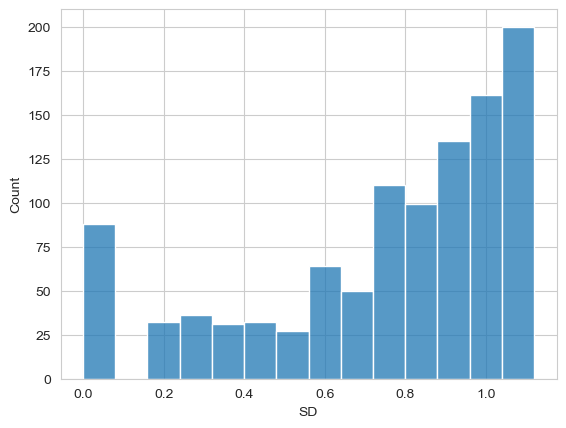

In [38]:
lowest_half_SD = all_words_and_measures[all_words_and_measures['SD'] < 1.13]
sn.histplot(data=lowest_half_SD['SD'])

<AxesSubplot:xlabel='Bard Continuous', ylabel='Count'>

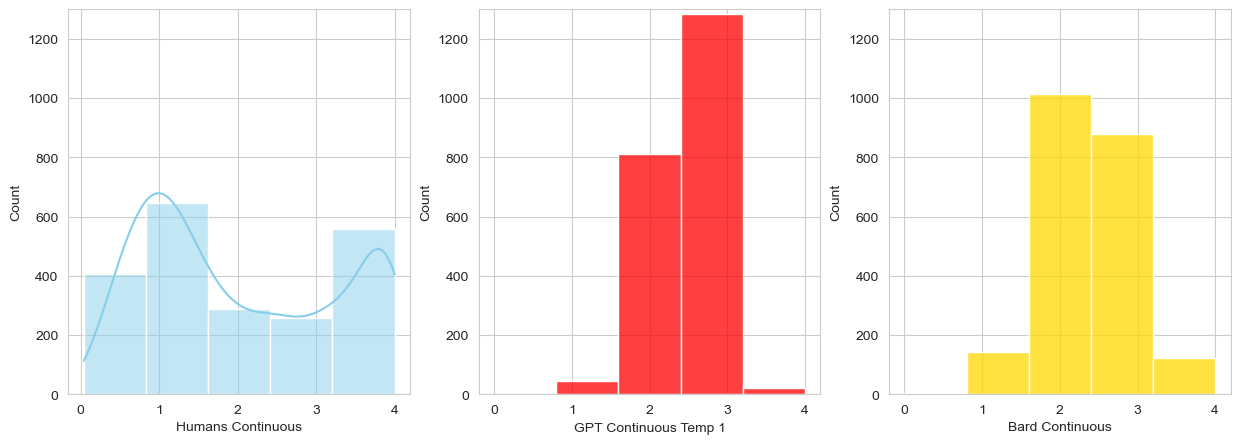

In [95]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].set_ylim(0,1300)
axs[1].set_ylim(0,1300)
axs[2].set_ylim(0,1300)

sn.histplot(data=all_words_and_measures, x="Humans Continuous", kde=True, color="skyblue", ax=axs[0], bins=5)
sn.histplot(data=all_words_and_measures, x="GPT Continuous Temp 1", color="red", ax=axs[1], bins=5)
sn.histplot(data=all_words_and_measures, x="Bard Continuous", color="gold", ax=axs[2], bins=5)

                      Stim         Bard  Bard 0 or 1  Bard Continuous  \
0       the alcohol blood.     Nonsense            0                2   
1      the alcohol screen.     Nonsense            0                1   
2     the alligator mouth.  Makes Sense            1                2   
3      the alligator skin.     Nonsense            0                3   
4      the ankle bracelet.     Nonsense            0                3   
...                    ...          ...          ...              ...   
2152      the woman judge.  Makes Sense            1                4   
2153   the woman mountain.     Nonsense            0                3   
2155      the worm farmer.     Nonsense            0                2   
2156        the yarn ball.     Nonsense            0                3   
2157       the zebra skin.     Nonsense            0                3   

       GPT Temp 0  GPT Temp .5   GPT Temp 1  GPT Continuous Temp 0  \
0        Nonsense     Nonsense     Nonsense          

C:\Users\Nick\AppData\Local\Temp\ipykernel_14284\1783741248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_middle['0 or 1'] = np.where(remove_middle['GPT Temp 1'] == 'Makes Sense',1,0)


<AxesSubplot:xlabel='SD', ylabel='Count'>

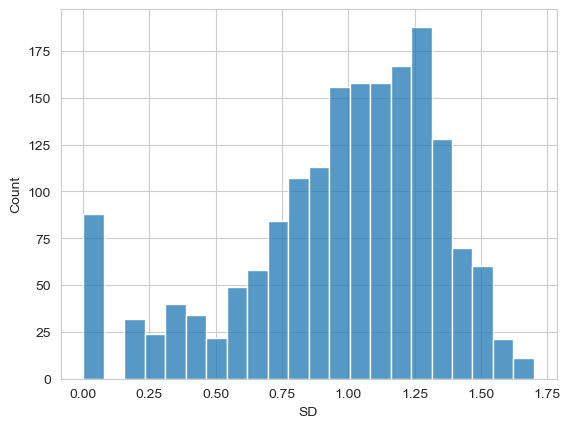

In [97]:
# sn.histplot(data=all_words_and_measures['SD'])

remove_middle = all_words_and_measures[all_words_and_measures['Humans Binary'].isin(['Makes Sense', 'Nonsense'])]
remove_middle['0 or 1'] = np.where(remove_middle['GPT Temp 1'] == 'Makes Sense',1,0)
print(remove_middle)

sn.histplot(data=remove_middle['SD'])

# meaningful = remove_middle[remove_middle['Humans Binary'] == 'Makes Sense']
# nonsense = remove_middle[remove_middle['Humans Binary'] == 'Nonsense']

# sn.histplot(data=meaningful['SD'], bins=12)

# sn.histplot(data=nonsense['SD'], bins=12)

<AxesSubplot:xlabel='Humans Binary', ylabel='count'>

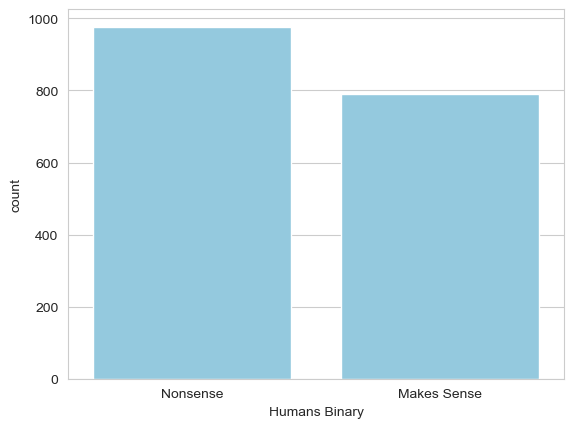

In [98]:
sn.countplot(data=remove_middle, x="Humans Binary", color='skyblue')

<AxesSubplot:xlabel='Bard Continuous', ylabel='Count'>

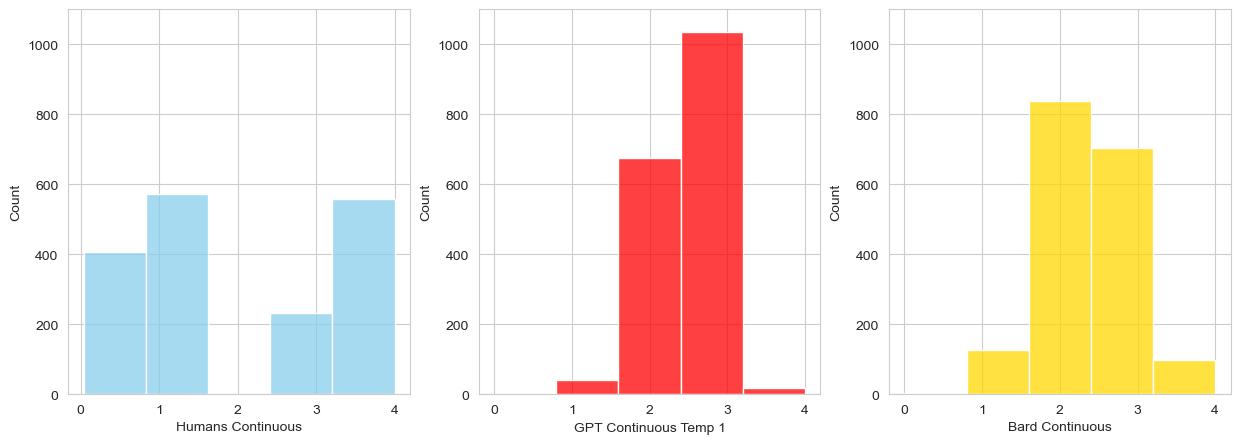

In [100]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].set_ylim(0,1100)
axs[1].set_ylim(0,1100)
axs[2].set_ylim(0,1100)

sn.histplot(data=remove_middle, x="Humans Continuous", color="skyblue", ax=axs[0], bins=5)
sn.histplot(data=remove_middle, x="GPT Continuous Temp 1", color="red", ax=axs[1], bins=5)
sn.histplot(data=remove_middle, x="Bard Continuous", color="gold", ax=axs[2], bins=5)

In [137]:
#set the SD that you'd like to remove
#i.e., setting as '1' removes all items where 1 SD away would change the answer from makes sense to nonsense and vice versa

#one tailed test, p < .05 means SD of 1.65
# p < .01 means SD of 2.32
# p < .001 means SD of 3.09
# 0 means keep all of remove middle df

SD = 2.32

if SD == 0:
    remove_by_SD = remove_middle
else:
    sensible_SD = remove_middle[(remove_middle['Humans Continuous'] >= 2.5) & (remove_middle['Humans Continuous'] - (SD * remove_middle['SD']) >= 1.5)]
    nonsensible_SD = remove_middle[(remove_middle['Humans Continuous'] <= 1.5) & (remove_middle['Humans Continuous'] + (SD * remove_middle['SD']) <= 2.5)]
    remove_by_SD = pd.concat([sensible_SD, nonsensible_SD])

remove_by_SD

,Stim,Bard,Bard 0 or 1,Bard Continuous,GPT Temp 0,GPT Temp .5,GPT Temp 1,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,...,Logw1frq,Logw2frq,Logwordfrq_sum,pairs,Word2Vec,GloVe,Taxonomic,Humans Binary,Difference Score,0 or 1
3,the alligator skin.,Nonsense,0,3,Makes Sense,Makes Sense,Makes Sense,3,3,3,...,1.38,3.21,4.59,alligator skin,0.150999,0.284452,0.227702,Makes Sense,0.93,1
4,the ankle bracelet.,Nonsense,0,3,Makes Sense,Makes Sense,Makes Sense,4,3,3,...,2.27,1.81,4.08,ankle bracelet,0.158441,0.392702,0.263679,Makes Sense,0.00,1
7,the ant hill.,Makes Sense,1,2,Makes Sense,Makes Sense,Makes Sense,4,4,3,...,1.84,3.10,4.94,ant hill,0.169495,0.195548,0.187190,Makes Sense,0.07,1
16,the apple cider.,Makes Sense,1,3,Makes Sense,Makes Sense,Makes Sense,4,4,2,...,2.50,1.82,4.32,apple cider,0.444181,0.421407,0.610012,Makes Sense,0.00,1
17,the apple juice.,Makes Sense,1,4,Makes Sense,Makes Sense,Makes Sense,4,4,2,...,2.50,2.56,5.06,apple juice,0.447456,0.441051,0.631162,Makes Sense,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,the truck pig.,Nonsense,0,2,Makes Sense,Makes Sense,Makes Sense,2,2,2,...,2.65,2.51,5.15,truck pig,0.189152,0.151660,0.311380,Nonsense,1.79,1
2077,the vehicle star.,Makes Sense,1,2,Nonsense,Makes Sense,Makes Sense,2,2,2,...,2.58,2.98,5.56,vehicle star,0.002114,0.145705,0.159272,Nonsense,1.46,1
2087,the water flour.,Makes Sense,1,2,Nonsense,Nonsense,Nonsense,2,2,1,...,3.89,2.66,6.55,water flour,0.277613,0.281049,0.453493,Nonsense,1.54,0
2147,the witch sea.,Makes Sense,1,1,Makes Sense,Makes Sense,Makes Sense,2,2,2,...,2.45,3.46,5.90,witch sea,0.143153,0.165224,0.206266,Nonsense,1.57,1


In [138]:
GPT_wrong = remove_by_SD[(remove_by_SD['GPT Temp 1'] != remove_by_SD['Humans Binary'])]
Bard_wrong = remove_by_SD[(remove_by_SD['Bard'] != remove_by_SD['Humans Binary'])]
Both_wrong = remove_by_SD[(remove_by_SD['GPT Temp 1'] != remove_by_SD['Humans Binary']) & (remove_by_SD['Bard'] != remove_by_SD['Humans Binary'])]
Both_wrong

,Stim,Bard,Bard 0 or 1,Bard Continuous,GPT Temp 0,GPT Temp .5,GPT Temp 1,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,...,Logw1frq,Logw2frq,Logwordfrq_sum,pairs,Word2Vec,GloVe,Taxonomic,Humans Binary,Difference Score,0 or 1
335,the butt cheek.,Nonsense,0,2,Nonsense,Nonsense,Nonsense,2,2,1,...,2.08,2.65,4.73,butt cheek,0.380631,0.332747,0.590026,Makes Sense,1.79,0
529,the clown face.,Nonsense,0,2,Nonsense,Nonsense,Nonsense,2,2,2,...,1.76,3.90,5.67,clown face,0.157458,0.151656,0.275065,Makes Sense,1.71,0
1712,the school police.,Nonsense,0,2,Nonsense,Nonsense,Nonsense,2,2,2,...,3.84,3.58,7.42,school police,0.201379,0.269127,0.354206,Makes Sense,1.57,0
33,the arrow orange.,Makes Sense,1,2,Makes Sense,Makes Sense,Makes Sense,2,2,2,...,2.16,2.69,4.86,arrow orange,0.247693,0.197636,0.315018,Nonsense,1.64,1
69,the bag flea.,Makes Sense,1,1,Makes Sense,Makes Sense,Makes Sense,3,2,3,...,3.05,1.48,4.53,bag flea,0.175429,0.189239,0.241360,Nonsense,2.68,1
140,the bell gold.,Makes Sense,1,4,Makes Sense,Makes Sense,Makes Sense,2,3,3,...,2.71,3.20,5.90,bell gold,0.153082,0.124960,0.403621,Nonsense,1.34,1
178,the blood bird.,Makes Sense,1,2,Makes Sense,Makes Sense,Makes Sense,2,2,2,...,3.40,2.88,6.28,blood bird,0.075824,0.199677,0.371522,Nonsense,1.50,1
181,the blood cow.,Makes Sense,1,1,Makes Sense,Makes Sense,Makes Sense,3,3,3,...,3.40,2.61,6.01,blood cow,0.202027,0.290416,0.440011,Nonsense,2.54,1
209,the book baker.,Makes Sense,1,2,Makes Sense,Makes Sense,Makes Sense,2,2,3,...,3.69,2.43,6.12,book baker,0.148446,0.236229,0.172487,Nonsense,1.79,1
210,the book bell.,Makes Sense,1,2,Makes Sense,Makes Sense,Makes Sense,2,2,3,...,3.69,2.71,6.40,book bell,0.040045,0.147386,0.242679,Nonsense,1.61,1


In [139]:
fobs_bard = remove_by_SD['Bard'].value_counts()
fobs_gpt = remove_by_SD['GPT Temp 1'].value_counts()
fexp = remove_by_SD['Humans Binary'].value_counts()
    
GPTchi = stats.chisquare(f_obs=[fobs_gpt[0], fobs_gpt[1]], f_exp=[fexp[0],fexp[1]])
Bardchi = stats.chisquare(f_obs=[fobs_bard[0], fobs_bard[1]], f_exp=[fexp[0],fexp[1]])

## instead of frequency distribution - we need to measure exact matches

print(fexp)
print('########')
print(fobs_gpt)
print(GPTchi)
print('#############')
print(fobs_bard)
print(Bardchi)

Makes Sense    387
Nonsense       160
Name: Humans Binary, dtype: int64
########
Makes Sense    468
Nonsense        79
Name: GPT Temp 1, dtype: int64
Power_divergenceResult(statistic=57.95973837209303, pvalue=2.675378133024612e-14)
#############
Makes Sense    390
Nonsense       157
Name: Bard, dtype: int64
Power_divergenceResult(statistic=0.07950581395348838, pvalue=0.7779682365163169)


<AxesSubplot:xlabel='Bard Continuous', ylabel='Count'>

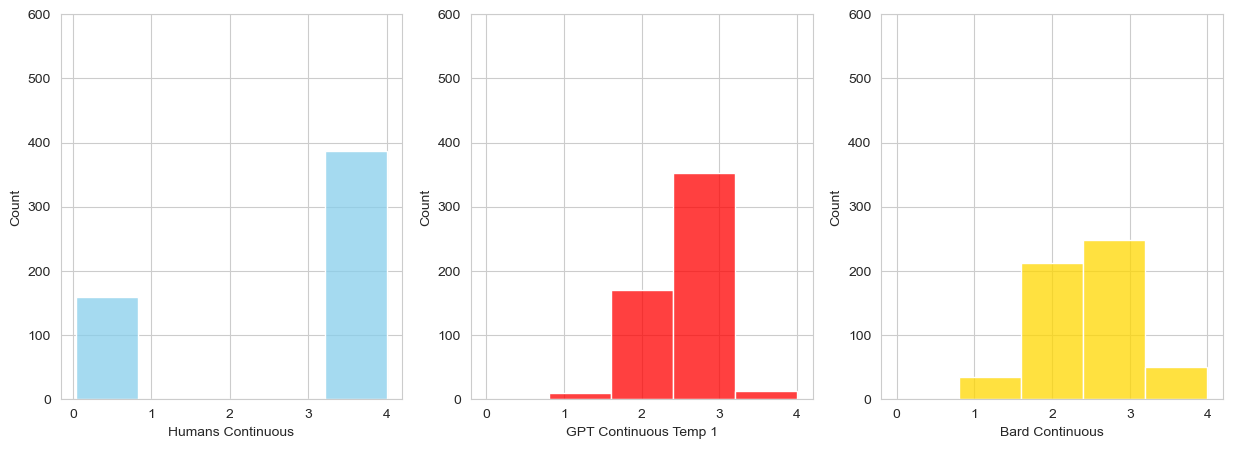

In [140]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].set_ylim(0,600)
axs[1].set_ylim(0,600)
axs[2].set_ylim(0,600)

sn.histplot(data=remove_by_SD, x="Humans Continuous", color="skyblue", ax=axs[0], bins=5)
sn.histplot(data=remove_by_SD, x="GPT Continuous Temp 1", color="red", ax=axs[1], bins=5)
sn.histplot(data=remove_by_SD, x="Bard Continuous", color="gold", ax=axs[2], bins=5)

GPT Temp 1     Makes Sense  Nonsense
Humans Binary                       
Makes Sense            371        16
Nonsense                97        63


<AxesSubplot:xlabel='Humans Binary'>

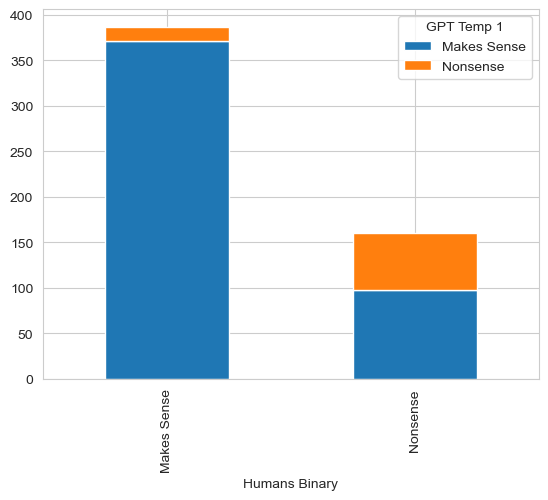

In [141]:
#Out of ~1000 nonsense labels by humans, over 700 are labeled as 'Makes Sense' by GPT 3.5

#sn.countplot(data=remove_middle, x="Humans Binary", palette='viridis', hue="GPT Temp 0")

df_plot = remove_by_SD.groupby(['GPT Temp 1', 'Humans Binary']).size().reset_index().pivot(columns='GPT Temp 1', index='Humans Binary', values=0)
print(df_plot)

df_plot.plot(kind='bar', stacked=True)

Bard           Makes Sense  Nonsense
Humans Binary                       
Makes Sense            311        76
Nonsense                79        81


<AxesSubplot:xlabel='Humans Binary'>

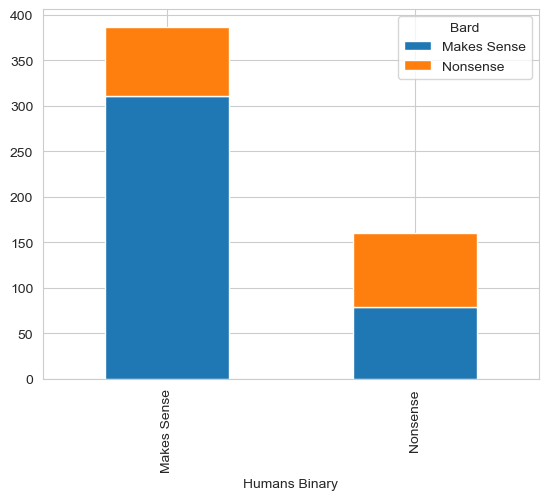

In [142]:
#Out of ~1000 nonsense labels by humans, over 700 are labeled as 'Makes Sense' by GPT 3.5

#sn.countplot(data=remove_middle, x="Humans Binary", palette='viridis', hue="GPT Temp 0")

df_plot = remove_by_SD.groupby(['Bard', 'Humans Binary']).size().reset_index().pivot(columns='Bard', index='Humans Binary', values=0)
print(df_plot)

df_plot.plot(kind='bar', stacked=True)

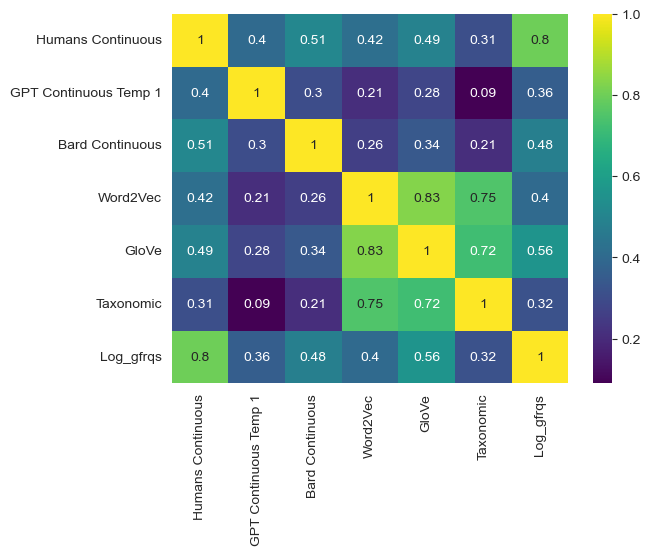

In [143]:
abbrev_measures = remove_by_SD[['Humans Continuous', 'GPT Continuous Temp 1', 'Bard Continuous', 'Word2Vec', 'GloVe', 'Taxonomic', 'Log_gfrqs']]
corr_mat = abbrev_measures.corr().round(decimals=2)
sn.heatmap(corr_mat, annot=True, cmap='viridis')
plt.show()

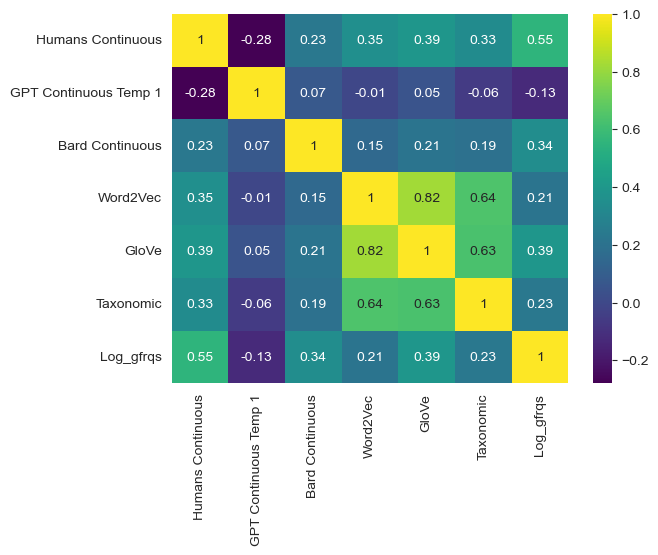

In [144]:
abbrev_measures = GPT_wrong[['Humans Continuous', 'GPT Continuous Temp 1', 'Bard Continuous', 'Word2Vec', 'GloVe', 'Taxonomic', 'Log_gfrqs']]
corr_mat = abbrev_measures.corr().round(decimals=2)
sn.heatmap(corr_mat, annot=True, cmap='viridis')
plt.show()

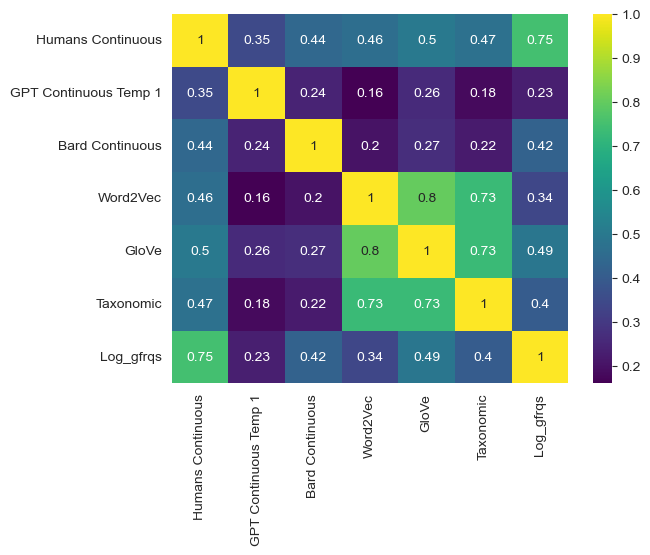

In [145]:
abbrev_measures = Bard_wrong[['Humans Continuous', 'GPT Continuous Temp 1', 'Bard Continuous', 'Word2Vec', 'GloVe', 'Taxonomic', 'Log_gfrqs']]
corr_mat = abbrev_measures.corr().round(decimals=2)
sn.heatmap(corr_mat, annot=True, cmap='viridis')
plt.show()

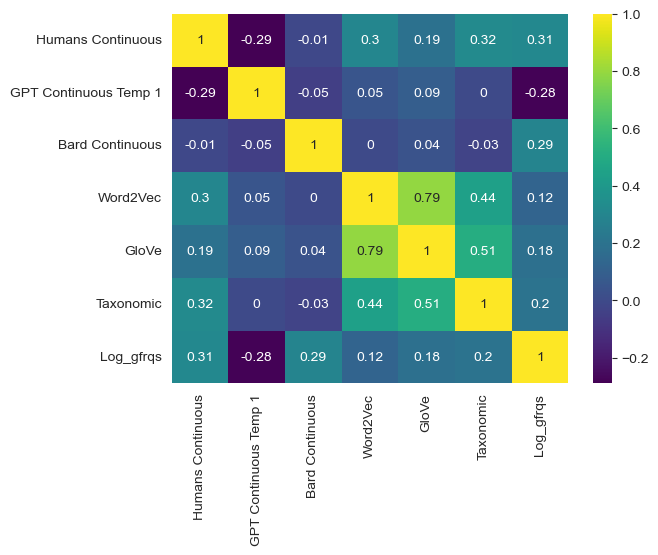

In [146]:
abbrev_measures = Both_wrong[['Humans Continuous', 'GPT Continuous Temp 1', 'Bard Continuous', 'Word2Vec', 'GloVe', 'Taxonomic', 'Log_gfrqs']]
corr_mat = abbrev_measures.corr().round(decimals=2)
sn.heatmap(corr_mat, annot=True, cmap='viridis')
plt.show()

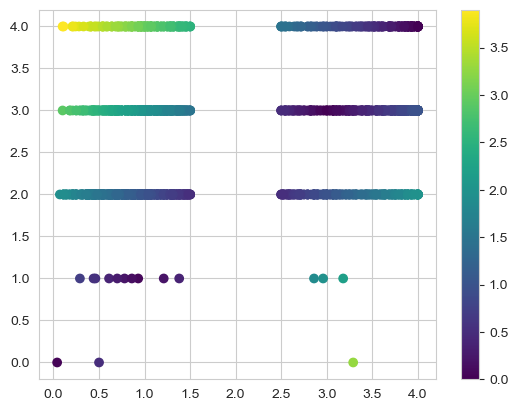

In [432]:
#scatter of Graves 2013 with GPT. Colors and Sizes reflect the difference scores between the two

sn.set_style('whitegrid')
cmap = sn.color_palette("viridis", as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(remove_by_SD['Humans Continuous'], remove_by_SD['GPT Continuous Temp 0'], c=remove_by_SD['Difference Score'], cmap=cmap)
f.colorbar(points)

In [147]:
answer_types = [
    (remove_by_SD['GPT Temp 1'] == 'Makes Sense') & (remove_by_SD['Humans Binary'] == 'Nonsense'),
    (remove_by_SD['GPT Temp 1'] == 'Nonsense') & (remove_by_SD['Humans Binary'] == 'Makes Sense'),
    (remove_by_SD['GPT Temp 1'] == 'Makes Sense') & (remove_by_SD['Humans Binary'] == 'Makes Sense'),
    (remove_by_SD['GPT Temp 1'] == 'Nonsense') & (remove_by_SD['Humans Binary'] == 'Nonsense')
]

answer_names = ['False Alarm', 'Miss', 'Hit', 'Correct Rejection']

remove_by_SD['GPT Answer Type'] = np.select(answer_types, answer_names)

print(remove_by_SD)

                     Stim         Bard  Bard 0 or 1  Bard Continuous  \
3     the alligator skin.     Nonsense            0                3   
4     the ankle bracelet.     Nonsense            0                3   
7           the ant hill.  Makes Sense            1                2   
16       the apple cider.  Makes Sense            1                3   
17       the apple juice.  Makes Sense            1                4   
...                   ...          ...          ...              ...   
2049       the truck pig.     Nonsense            0                2   
2077    the vehicle star.  Makes Sense            1                2   
2087     the water flour.  Makes Sense            1                2   
2147       the witch sea.  Makes Sense            1                1   
2153  the woman mountain.     Nonsense            0                3   

       GPT Temp 0  GPT Temp .5   GPT Temp 1  GPT Continuous Temp 0  \
3     Makes Sense  Makes Sense  Makes Sense                      

In [148]:
answer_types = [
    (remove_by_SD['Bard'] == 'Makes Sense') & (remove_by_SD['Humans Binary'] == 'Nonsense'),
    (remove_by_SD['Bard'] == 'Nonsense') & (remove_by_SD['Humans Binary'] == 'Makes Sense'),
    (remove_by_SD['Bard'] == 'Makes Sense') & (remove_by_SD['Humans Binary'] == 'Makes Sense'),
    (remove_by_SD['Bard'] == 'Nonsense') & (remove_by_SD['Humans Binary'] == 'Nonsense')
]

answer_names = ['False Alarm', 'Miss', 'Hit', 'Correct Rejection']

remove_by_SD['Bard Answer Type'] = np.select(answer_types, answer_names)

print(remove_by_SD)

                     Stim         Bard  Bard 0 or 1  Bard Continuous  \
3     the alligator skin.     Nonsense            0                3   
4     the ankle bracelet.     Nonsense            0                3   
7           the ant hill.  Makes Sense            1                2   
16       the apple cider.  Makes Sense            1                3   
17       the apple juice.  Makes Sense            1                4   
...                   ...          ...          ...              ...   
2049       the truck pig.     Nonsense            0                2   
2077    the vehicle star.  Makes Sense            1                2   
2087     the water flour.  Makes Sense            1                2   
2147       the witch sea.  Makes Sense            1                1   
2153  the woman mountain.     Nonsense            0                3   

       GPT Temp 0  GPT Temp .5   GPT Temp 1  GPT Continuous Temp 0  \
3     Makes Sense  Makes Sense  Makes Sense                      

In [149]:
bard_hits = remove_by_SD['Bard Answer Type'].value_counts()['Hit']
bard_misses = remove_by_SD['Bard Answer Type'].value_counts()['Miss']
bard_fas = remove_by_SD['Bard Answer Type'].value_counts()['False Alarm']
bard_crs = remove_by_SD['Bard Answer Type'].value_counts()['Correct Rejection']

gpt_hits = remove_by_SD['GPT Answer Type'].value_counts()['Hit']
gpt_misses = remove_by_SD['GPT Answer Type'].value_counts()['Miss']
gpt_fas = remove_by_SD['GPT Answer Type'].value_counts()['False Alarm']
gpt_crs = remove_by_SD['GPT Answer Type'].value_counts()['Correct Rejection']

print('######## BARD Stats #######')
print('hits = ', bard_hits)
print('misses = ', bard_misses)
print('fas = ', bard_fas)
print('crs = ', bard_crs)
print('####### GPT Stats ########')
print('hits = ', gpt_hits)
print('misses = ', gpt_misses)
print('fas = ', gpt_fas)
print('crs = ', gpt_crs)

######## BARD Stats #######
hits =  311
misses =  76
fas =  79
crs =  81
####### GPT Stats ########
hits =  371
misses =  16
fas =  97
crs =  63


In [150]:
from scipy.stats import norm
import math
Z = norm.ppf

def SDT(hits, misses, fas, crs):
    """ returns a dict with d-prime measures given hits, misses, false alarms, and correct rejections"""
    # Floors an ceilings are replaced by half hits and half FA's
    half_hit = 0.5 / (hits + misses)
    half_fa = 0.5 / (fas + crs)
     # Calculate hit_rate and avoid d' infinity
    hit_rate = hits / (hits + misses)
    if hit_rate == 1: 
        hit_rate = 1 - half_hit
    if hit_rate == 0: 
        hit_rate = half_hit
 
    # Calculate false alarm rate and avoid d' infinity
    fa_rate = fas / (fas + crs)
    if fa_rate == 1: 
        fa_rate = 1 - half_fa
    if fa_rate == 0: 
        fa_rate = half_fa
        
    #transform beta to base 10 log of beta
    beta = math.exp((Z(fa_rate)**2 - Z(hit_rate)**2) / 2)
    beta = math.log10(beta)
 
    # Return d', beta, c and Ad'
    out = {}
    out['d'] = Z(hit_rate) - Z(fa_rate)
    out['beta'] = beta
    out['c'] = -(Z(hit_rate) + Z(fa_rate)) / 2
    out['Ad'] = norm.cdf(out['d'] / math.sqrt(2))
    
    return(out)

In [151]:
### D prime is sensitivity to signal being present (i.e., presence of a meaningful word) - higher is better
### Beta is bias, how willing the the observer is to say there is signal present - closer to 0 is better


Bard_SDT = SDT(bard_hits, bard_misses, bard_fas, bard_crs)
GPT_SDT = SDT(gpt_hits, gpt_misses, gpt_fas, gpt_crs)

print('##### Bard SDT #####')
print(Bard_SDT)
print('######## GPT SDT ####')
print(GPT_SDT)

##### Bard SDT #####
{'d': 0.8702810977026414, 'beta': -0.15854347481434639, 'c': -0.4194734812265507, 'Ad': 0.7308486517366866}
######## GPT SDT ####
{'d': 1.4657435287128364, 'beta': -0.6381112888859647, 'c': -1.0024301746365758, 'Ad': 0.8500008858009354}


<AxesSubplot:xlabel='Bard Answer Type', ylabel='count'>

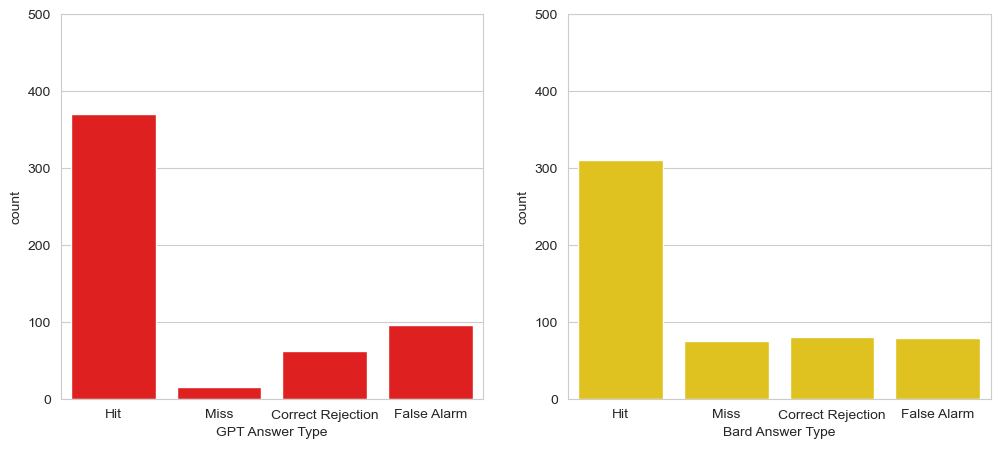

In [152]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].set_ylim(0,500)
axs[1].set_ylim(0,500)

sn.countplot(data=remove_by_SD, x="GPT Answer Type", color="red", ax=axs[0], order=['Hit', 'Miss', 'Correct Rejection', 'False Alarm'])
sn.countplot(data=remove_by_SD, x="Bard Answer Type", color="gold", ax=axs[1], order=['Hit', 'Miss', 'Correct Rejection', 'False Alarm'])

<AxesSubplot:xlabel='Humans Continuous', ylabel='GPT Continuous Temp 0'>

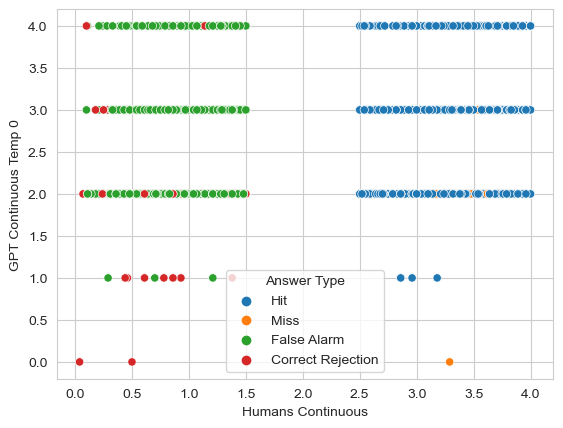

In [438]:
sn.scatterplot(data=remove_by_SD, x='Humans Continuous', y='GPT Continuous Temp 0', hue='Answer Type')

In [156]:
binary_for_ROC = [
    (remove_by_SD['Humans Binary'] == 'Nonsense'),
    (remove_by_SD['Humans Binary'] == 'Makes Sense')
]

binary_for_GPT = [
    (remove_by_SD['GPT Temp 1'] == 'Nonsense'),
    (remove_by_SD['GPT Temp 1'] == 'Makes Sense')
]

binary_for_bard = [
    (remove_by_SD['Bard'] == 'Nonsense'),
    (remove_by_SD['Bard'] == 'Makes Sense')
]

labels_for_ROC = [0, 1]

remove_by_SD['Truth'] = np.select(binary_for_ROC, labels_for_ROC)
remove_by_SD['GPT Predicted'] = np.select(binary_for_GPT, labels_for_ROC)
remove_by_SD['Bard Predicted'] = np.select(binary_for_bard, labels_for_ROC)
remove_by_SD['Random'] = np.random.randint(0,2,size=len(remove_by_SD))

truth = remove_by_SD['Truth'].to_numpy()
gpt_predicted = remove_by_SD['GPT Predicted'].to_numpy()
bard_predicted = remove_by_SD['Bard Predicted'].to_numpy()
random = remove_by_SD['Random'].to_numpy()

print('true ratings (generated by people):', truth)
print('predicted by GPT:', gpt_predicted)
print('predicted by Bard:', bard_predicted)
print('randomly generated:', random)

true ratings (generated by people): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

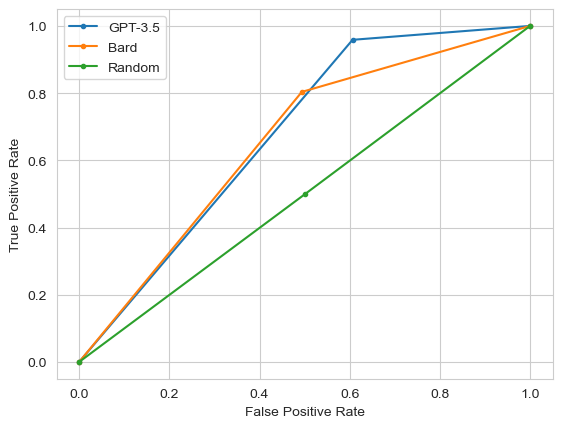

In [157]:
gpt_fpr, gpt_tpr, thresholds = roc_curve(truth, gpt_predicted, pos_label=1)
bard_fpr, bard_tpr, thresholds = roc_curve(truth, bard_predicted, pos_label=1)
rand_fpr, rand_tpr, thresholds = roc_curve(truth, random, pos_label=1)

pyplot.plot(gpt_fpr, gpt_tpr, marker='.', label='GPT-3.5')
pyplot.plot(bard_fpr, bard_tpr, marker='.', label='Bard')
pyplot.plot(rand_fpr, rand_tpr, marker='.', label='Random')
# plot the roc curve for the model
pyplot.legend()
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [158]:
rand_auc = roc_auc_score(truth, random)
GPT_auc = roc_auc_score(truth, gpt_predicted)
Bard_auc = roc_auc_score(truth, bard_predicted)

print('Random Prediction: ', rand_auc)
print('GPT Prediction: ', GPT_auc)
print('Bard Prediction: ', Bard_auc)

Random Prediction:  0.4993540051679587
GPT Prediction:  0.676203165374677
Bard Prediction:  0.6549337855297157


In [8]:
fake_binary_subjects = pd.DataFrame(all_words_and_measures['Stim'])

for j in range(0,10000):
    for i in range(len(all_words_and_measures)):
        fake_binary_subjects.at[i, j] = random.randrange(2)

,Stim,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,the dog puppy.,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,the baby teeth.,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,the dress summer.,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,the boot car.,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,the pig truck.,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,the goat cheese.,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2156,the sand beach.,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2157,the mouth pig.,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2158,the field flower.,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [11]:
fake_binary_subjects['Humans Binary'] = all_words_and_measures['Humans Binary']
fake_binary_subjects['GPT Temp 0'] = all_words_and_measures['GPT Temp 0']

fake_binary_subjects_remove_middle = fake_binary_subjects[fake_binary_subjects['Humans Binary'].isin(['Makes Sense', 'Nonsense'])]
fake_binary_subjects_remove_middle['GPT 0 or 1'] = remove_middle['0 or 1']
fake_binary_subjects_remove_middle['Human 0 or 1'] = np.where(fake_binary_subjects_remove_middle['Humans Binary'] == 'Makes Sense',1,0)
fake_binary_subjects_remove_middle

C:\Users\Nick\AppData\Local\Temp\ipykernel_14284\2183958677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_binary_subjects_remove_middle['GPT 0 or 1'] = remove_middle['0 or 1']
C:\Users\Nick\AppData\Local\Temp\ipykernel_14284\2183958677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_binary_subjects_remove_middle['Human 0 or 1'] = np.where(fake_binary_subjects_remove_middle['Humans Binary'] == 'Makes Sense',1,0)


,Stim,0,1,2,3,4,5,6,7,8,...,9994,9995,9996,9997,9998,9999,Humans Binary,GPT Temp 0,GPT 0 or 1,Human 0 or 1
1,the baby teeth.,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,Makes Sense,Makes Sense,1,1
2,the dress summer.,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,Nonsense,Makes Sense,1,0
3,the boot car.,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,Nonsense,Nonsense,0,0
5,the boy cabin.,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,Nonsense,Nonsense,0,0
6,the heart guy.,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,Nonsense,Makes Sense,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,the goat cheese.,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,Makes Sense,Makes Sense,1,1
2156,the sand beach.,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,Makes Sense,Makes Sense,1,1
2157,the mouth pig.,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,Nonsense,Makes Sense,1,0
2158,the field flower.,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,Makes Sense,Makes Sense,1,1


In [21]:
fobs = fake_binary_subjects_remove_middle['GPT 0 or 1'].value_counts()
fobs_x = fobs[0]
fobs_y = fobs[1]

fexp = fake_binary_subjects_remove_middle['Human 0 or 1'].value_counts()
fexp_x = fexp[0]
fexp_y = fexp[1]

print('fobs: ', fobs)
print('fexp: ', fexp)

print(stats.chisquare(f_obs=[fobs_x, fobs_y], f_exp=[fexp_x,fexp_y])[0])

fobs:  1    1462
0     306
Name: GPT 0 or 1, dtype: int64
fexp:  0    977
1    791
Name: Human 0 or 1, dtype: int64
1030.045131578777


In [18]:
fexp = fake_binary_subjects_remove_middle['Human 0 or 1'].value_counts()
fexp_x = fexp[0]
fexp_y = fexp[1]

# def ChiSquarePermsHumanvsChance(fexp_x,fexp_y,df):

HumanVsChance_chi_list = []
HumansVsChance_p_list = []

for i in range(0,10000):
    fobs = fake_binary_subjects_remove_middle[i].value_counts()
    fobs_x = fobs[0]
    fobs_y = fobs[1]
    
    test = stats.chisquare(f_obs=[fobs_x,fobs_y], f_exp=[fexp_x,fexp_y])
#     chi = test[0]
#     p = test[1]
    
    HumansVsChance_p_list.append(test[1])
    HumanVsChance_chi_list.append(test[0])
    
    print(len(HumansVsChance_p_list))
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189


3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897


5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701


7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387


8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100


<AxesSubplot:ylabel='Count'>

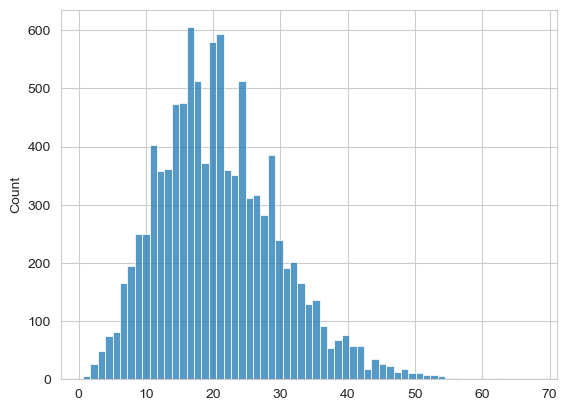

In [20]:
sn.histplot(data=HumanVsChance_chi_list)

In [22]:
fexp = fake_binary_subjects_remove_middle['GPT 0 or 1'].value_counts()
fexp_x = fexp[0]
fexp_y = fexp[1]

# def ChiSquarePermsHumanvsChance(fexp_x,fexp_y,df):

GPTVsChance_chi_list = []
GPTVsChance_p_list = []

for i in range(0,10000):
    fobs = fake_binary_subjects_remove_middle[i].value_counts()
    fobs_x = fobs[0]
    fobs_y = fobs[1]
    
    test = stats.chisquare(f_obs=[fobs_x,fobs_y], f_exp=[fexp_x,fexp_y])
#     chi = test[0]
#     p = test[1]
    
    GPTVsChance_p_list.append(test[1])
    GPTVsChance_chi_list.append(test[0])
    
    print(len(GPTVsChance_p_list))
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145


3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844


5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568


7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274


8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972


<AxesSubplot:ylabel='Count'>

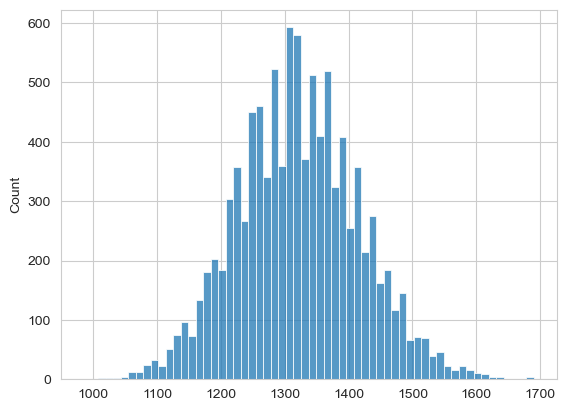

In [23]:
sn.histplot(data=GPTVsChance_chi_list)